In [43]:
import os
import sys
import glob
import json
import warnings
import numpy as np
import xarray as xr
import proplot as pplt
warnings.filterwarnings('ignore')
pplt.rc.update({'reso':'xx-hi','figure.dpi':100})

In [44]:
with open('/global/cfs/cdirs/m4334/sferrett/monsoon-kernels/scripts/configs.json','r',encoding='utf-8') as f:
    CONFIGS = json.load(f)
SPLITSDIR  = CONFIGS['filepaths']['splits']    
MODELSDIR  = CONFIGS['filepaths']['models']
WEIGHTSDIR = CONFIGS['filepaths']['weights']
MODELS     = CONFIGS['models']
SPLIT      = 'valid'   

In [45]:
weightsds = xr.open_dataset(f'{WEIGHTSDIR}/nonparametric_vertical_{SPLIT}_weights.nc')
splitds   = xr.open_dataset(f'{SPLITSDIR}/{SPLIT}.h5')

In [46]:
weights = weightsds.weights
levs    = weightsds.lev.values
dlev    = splitds.dlev

In [57]:
kerneldims = [d for d in ['lat','lon','lev','time'] if d in weights.dims]
integral   = (weights*dlev).sum(dim=kerneldims)

print('Integral check (should be ≈ 1.0):')
for i,field in enumerate(weights.field.values):
    for j in range(len(weights.member)):
        val = float(integral.isel(field=i,member=j).values)
        print(f'  {field}, kernel {j+1}: {val:.6f}')

Integral check (should be ≈ 1.0):
  rh, kernel 1: 1.000000
  rh, kernel 2: 1.000000
  rh, kernel 3: 1.000000
  rh, kernel 4: 1.000000
  thetae, kernel 1: 1.000000
  thetae, kernel 2: 1.000000
  thetae, kernel 3: 1.000000
  thetae, kernel 4: 1.000000
  thetaestar, kernel 1: 1.000000
  thetaestar, kernel 2: 1.000000
  thetaestar, kernel 3: 1.000000
  thetaestar, kernel 4: 1.000000


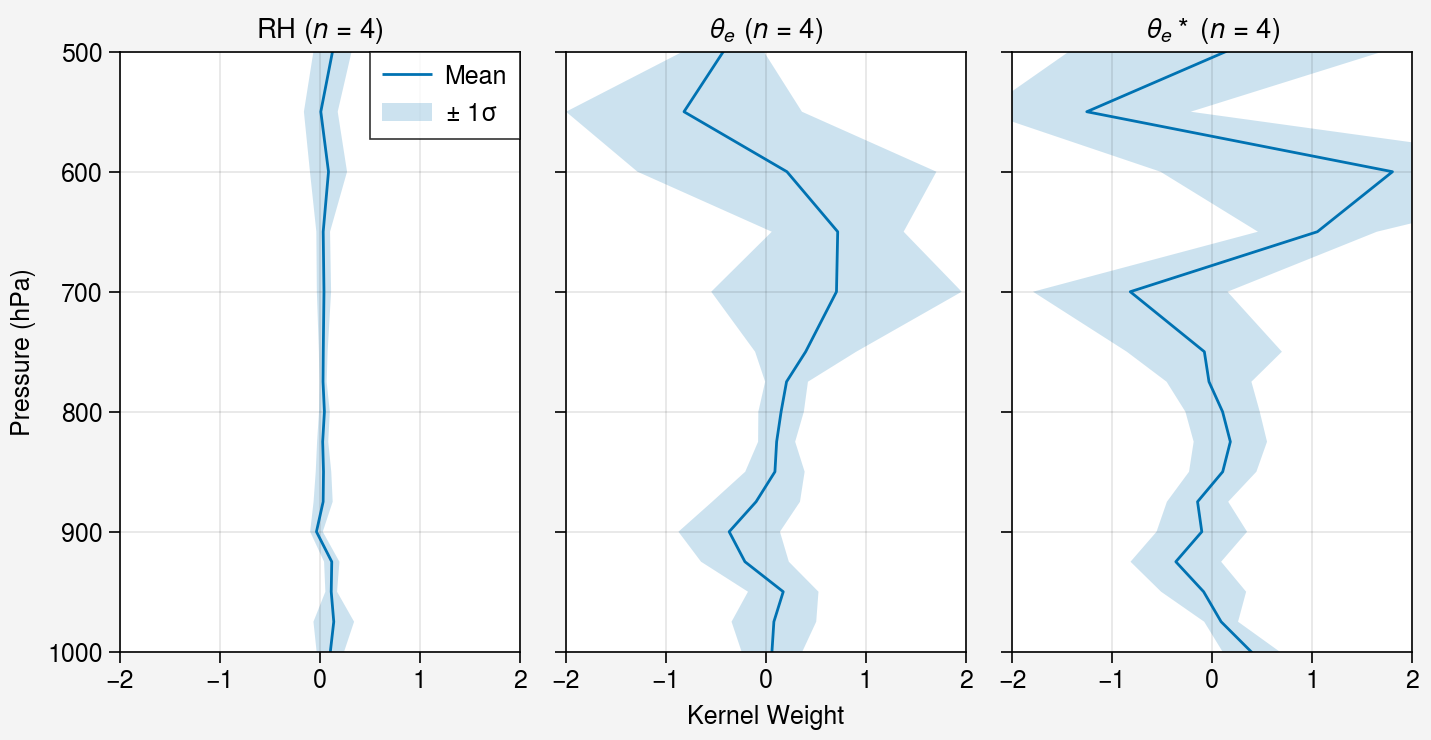

In [56]:
labels = [r'RH ($\mathit{n}$ = 4)',r'$\mathit{\theta_e}$ ($\mathit{n}$ = 4)',r'$\mathit{\theta_e}*$ ($\mathit{n}$ = 4)']     
means  = (weights*dlev).mean(dim='member')
stds   = (weights*dlev).std(dim='member')

fig,axs = pplt.subplots(nrows=1,ncols=3,refwidth=2,refheight=3,share=True)
for i,ax in enumerate(axs):
    mean = means[i,:]
    std  = stds[i,:]
    axs.format(xreverse=False)
    ax.plot(mean,levs,linewidth=1,label='Mean')
    ax.fill_betweenx(levs,mean-std,mean+std,alpha=0.2,label=r'± 1$\sigma$')
    ax.format(title=labels[i])
axs[0].legend(loc='ur',ncols=1)
axs.format(xlabel='Kernel Weight',xlim=(-2,2),xticks=1,xminorticks='none',xreverse=False,
           ylabel='Pressure (hPa)',yminorticks='none',yreverse=True)
pplt.show()